In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RAG_Embedding1-bbc_text_cls(DataSet).csv to RAG_Embedding1-bbc_text_cls(DataSet).csv


In [ ]:
df = pd.read_csv('RAG_Embedding1-bbc_text_cls(DataSet).csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
df_small = df.sample(100, random_state=0)

In [ ]:
df_small.shape

(100, 2)

<Axes: >

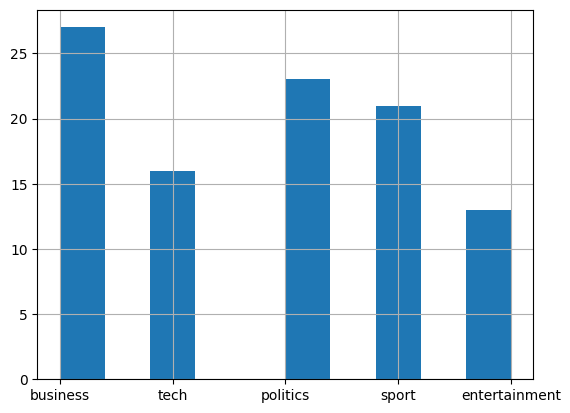

In [ ]:
df_small['labels'].hist()

In [ ]:
# Install the OpenAI package
!pip install openai

# Import the OpenAI package
import openai

# Set your API key
openai.api_key = "" #insert API Key



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.0/383.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
text = df_small['text'].iloc[0]
text

'Tate & Lyle boss bags top award\n\nTate & Lyle\'s chief executive has been named European Businessman of the Year by a leading business magazine.\n\nIain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate\'s shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\n\n"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 countries. Prev

In [ ]:
text = text.replace("\n", " ")

In [ ]:
emb = openai.embeddings.create(
    input=[text],
    model='text-embedding-3-small'
)
emb

CreateEmbeddingResponse(data=[Embedding(embedding=[-0.01942482776939869, -0.042999617755413055, 0.005831198301166296, -0.049699559807777405, -0.0037062170449644327, -0.01779984124004841, -0.02682476118206978, 0.07289934903383255, -0.01244363933801651, -0.03624967858195305, -0.009068669751286507, -0.08679922670125961, 0.006081196013838053, -0.01884983293712139, 0.0018265462713316083, 0.024387283250689507, -0.005103079602122307, -0.00035722338361665606, -0.04334961622953415, -0.027299758046865463, 0.00017529141041450202, -0.03104972466826439, 0.03762466460466385, 0.02473727986216545, 0.013962375931441784, 0.023837288841605186, 0.0010288971243426204, -0.012218641117215157, -0.02202480472624302, -0.012481139041483402, 0.02527477592229843, -0.011874894611537457, 0.01060615573078394, 0.04419960826635361, 0.010968652553856373, -0.03812466189265251, 0.027174757793545723, 0.020624816417694092, 0.013512379489839077, -0.007631182204931974, -0.0423746220767498, 0.015924857929348946, 0.008793671615

In [ ]:
emb.data[0].embedding

[-0.01942482776939869,
 -0.042999617755413055,
 0.005831198301166296,
 -0.049699559807777405,
 -0.0037062170449644327,
 -0.01779984124004841,
 -0.02682476118206978,
 0.07289934903383255,
 -0.01244363933801651,
 -0.03624967858195305,
 -0.009068669751286507,
 -0.08679922670125961,
 0.006081196013838053,
 -0.01884983293712139,
 0.0018265462713316083,
 0.024387283250689507,
 -0.005103079602122307,
 -0.00035722338361665606,
 -0.04334961622953415,
 -0.027299758046865463,
 0.00017529141041450202,
 -0.03104972466826439,
 0.03762466460466385,
 0.02473727986216545,
 0.013962375931441784,
 0.023837288841605186,
 0.0010288971243426204,
 -0.012218641117215157,
 -0.02202480472624302,
 -0.012481139041483402,
 0.02527477592229843,
 -0.011874894611537457,
 0.01060615573078394,
 0.04419960826635361,
 0.010968652553856373,
 -0.03812466189265251,
 0.027174757793545723,
 0.020624816417694092,
 0.013512379489839077,
 -0.007631182204931974,
 -0.0423746220767498,
 0.015924857929348946,
 0.008793671615421772,


In [ ]:
df_small.head()

,text,labels
384,Tate & Lyle boss bags top award\n\nTate & Lyle...,business
1983,Halo 2 sells five million copies\n\nMicrosoft ...,tech
985,MSPs hear renewed climate warning\n\nClimate c...,politics
1386,Pavey focuses on indoor success\n\nJo Pavey wi...,sport
1294,Tories reject rethink on axed MP\n\nSacked MP ...,politics


In [ ]:
model_name = 'text-embedding-3-small'

In [ ]:
def get_embedding(text):
    text = text.replace("\n", " ")
    emb = openai.embeddings.create(
        input=[text],
        model = model_name,
    )
    return emb.data[0].embedding

In [ ]:
df_small['embeddings'] = df_small['text'].apply(get_embedding)

In [ ]:
df_small.head()

,text,labels,embeddings
384,Tate & Lyle boss bags top award\n\nTate & Lyle...,business,"[-0.01942482776939869, -0.042999617755413055, ..."
1983,Halo 2 sells five million copies\n\nMicrosoft ...,tech,"[0.053237006068229675, 0.04723503440618515, 0...."
985,MSPs hear renewed climate warning\n\nClimate c...,politics,"[-0.0017343312501907349, 0.04673566296696663, ..."
1386,Pavey focuses on indoor success\n\nJo Pavey wi...,sport,"[0.01579407975077629, -0.011823033913969994, 0..."
1294,Tories reject rethink on axed MP\n\nSacked MP ...,politics,"[-0.02420785278081894, 0.02214985527098179, 0...."


In [ ]:
!pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 40.6 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np
dims = 1536
index = faiss.IndexFlatL2(dims)

In [ ]:
vectors= df_small['embeddings'].tolist()
vectors = np.array(vectors)

In [ ]:
index.add(vectors)

In [ ]:
print(df_small['text'].sample(random_state=2).iloc[0])

China had role in Yukos split-up

China lent Russia $6bn (£3.2bn) to help the Russian government renationalise the key Yuganskneftegas unit of oil group Yukos, it has been revealed.

The Kremlin said on Tuesday that the $6bn which Russian state bank VEB lent state-owned Rosneft to help buy Yugansk in turn came from Chinese banks. The revelation came as the Russian government said Rosneft had signed a long-term oil supply deal with China. The deal sees Rosneft receive $6bn in credits from China's CNPC.

According to Russian newspaper Vedomosti, these credits would be used to pay off the loans Rosneft received to finance the purchase of Yugansk. Reports said CNPC had been offered 20% of Yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. Analysts said one factor that might have influenced the Chinese decision was the possibility of litigation from Yukos, Yugansk's former owner, if CNPC had become a shareholder. Rosneft and VEB declined t

In [ ]:
query = "what did Dmitry Lukashov, an analyst at brokerage Aton say regarding china?"

In [ ]:
query_emb = get_embedding(query)

In [ ]:
query_emb = np.array(query_emb).reshape(1 , -1)
distances, indices = index.search(query_emb, k = 5)

In [ ]:
distances

array([[1.1033428, 1.327593 , 1.3794813, 1.4310712, 1.433177 ]],
      dtype=float32)

In [ ]:
indices

array([[83, 67, 16, 89, 39]])

In [ ]:
df_small.iloc[indices[0][0]].text

'China had role in Yukos split-up\n\nChina lent Russia $6bn (£3.2bn) to help the Russian government renationalise the key Yuganskneftegas unit of oil group Yukos, it has been revealed.\n\nThe Kremlin said on Tuesday that the $6bn which Russian state bank VEB lent state-owned Rosneft to help buy Yugansk in turn came from Chinese banks. The revelation came as the Russian government said Rosneft had signed a long-term oil supply deal with China. The deal sees Rosneft receive $6bn in credits from China\'s CNPC.\n\nAccording to Russian newspaper Vedomosti, these credits would be used to pay off the loans Rosneft received to finance the purchase of Yugansk. Reports said CNPC had been offered 20% of Yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. Analysts said one factor that might have influenced the Chinese decision was the possibility of litigation from Yukos, Yugansk\'s former owner, if CNPC had become a shareholder. Rosneft and VEB d

In [ ]:
def complete(user_prompt, max_tokens=100):
  completion = openai.chat.completions.create(
      model = 'gpt-4o-mini',
      messages = [
          {"role":"user", "content":user_prompt},
      ],
      temperature=0,
      max_tokens=max_tokens,
  )
  return completion

def print_response(completion):
  content = completion.choices[0].message.content
  print(content)

In [ ]:
def qa(question, context):
  prompt = f"""Please answer the question given the provided context.

  Question:
  ```{question}```

  Context:
  ```{context}```
  """

  completion = complete(prompt)
  print_response(completion)

In [ ]:
qa(query, df_small.iloc[indices[0][0]].text)

Dmitry Lukashov, an analyst at brokerage Aton, stated that the Chinese are trying to gain leverage in Russia and are more focused on securing guaranteed supplies rather than property rights, which he noted are not the most important in Russia. He also mentioned that if the price of oil is fixed under the deal, it could be very profitable for the Chinese, while highlighting that Rosneft is in desperate need of cash, making the deal beneficial for them as well.
